In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

input_file = "all_actionlint_results.jsonl"

all_entries = []

with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            arr = json.loads(line)
            all_entries.extend(arr)
        except json.JSONDecodeError as e:
            print("Skipping invalid JSON line:", line[:100])
            continue

df = pd.DataFrame(all_entries)

print("Loaded entries:", len(df))


Loaded entries: 154024


In [2]:
df = df[df["filepath"].str.contains(r"\.github/workflows/", regex=True)]

In [3]:
df["Repository"] = df["filepath"].str.split("/").str[1]

In [4]:
df

,message,filepath,line,column,kind,snippet,end_column,Repository
31,"the runner of ""actions/checkout@v3"" action is ...",cloned_repos/1panel-dev/1panel/.github/workflo...,11,15,action,- uses: actions/checkout@v3\n ...,33,1panel-dev
32,"the runner of ""softprops/action-gh-release@v1""...",cloned_repos/1panel-dev/1panel/.github/workflo...,32,15,action,uses: softprops/action-gh-release@v1\n...,44,1panel-dev
33,"the runner of ""softprops/action-gh-release@v1""...",cloned_repos/1panel-dev/1panel/.github/workflo...,32,15,action,uses: softprops/action-gh-release@v1\n...,44,1panel-dev
34,"the runner of ""actions/checkout@v3"" action is ...",cloned_repos/1panel-dev/1panel/.github/workflo...,13,15,action,- uses: actions/checkout@v3\n ...,33,1panel-dev
35,"the runner of ""actions/checkout@v2"" action is ...",cloned_repos/1panel-dev/1panel/.github/workflo...,9,13,action,uses: actions/checkout@v2\n ^...,31,1panel-dev
...,...,...,...,...,...,...,...,...
153897,"workflow command ""set-output"" was deprecated. ...",cloned_repos/zylon-ai/private-gpt/.github/work...,36,14,deprecated-commands,run: |\n ^,14,zylon-ai
153898,"the runner of ""actions/setup-node@v3"" action i...",cloned_repos/zylon-ai/private-gpt/.github/work...,18,15,action,uses: actions/setup-node@v3\n ...,35,zylon-ai
153899,"the runner of ""actions/stale@v8"" action is too...",cloned_repos/zylon-ai/private-gpt/.github/work...,21,13,action,- uses: actions/stale@v8\n ^~~~...,28,zylon-ai
153900,"the runner of ""actions/upload-artifact@v3"" act...",cloned_repos/zylon-ai/private-gpt/.github/work...,48,15,action,uses: actions/upload-artifact@v3\n ...,40,zylon-ai


In [5]:
df["error_type"] = df["message"].str.split().str[:4].str.join(" ")


In [6]:
error_counts = df["error_type"].value_counts().reset_index()
error_counts.columns = ["Error Type", "Count"]
print(error_counts)


                                    Error Type  Count
0          the runner of "actions/checkout@v3"    430
1          the runner of "actions/checkout@v2"    155
2      the runner of "actions/setup-python@v4"    129
3                   description is required in    128
4        the runner of "actions/setup-node@v3"     93
..                                         ...    ...
464   label "depot-ubuntu-22.04-8" is unknown.      1
465     property "logseq_posthog_token" is not      1
466                      property "ref" is not      1
467  label "depot-ubuntu-22.04-16" is unknown.      1
468                "tags-ignore" filter is not      1

[469 rows x 2 columns]


In [7]:
df_error_counts = df["error_type"].value_counts().reset_index()

In [8]:
df_error_counts.columns = ["error_type", "count"]
df_error_counts

,error_type,count
0,"the runner of ""actions/checkout@v3""",430
1,"the runner of ""actions/checkout@v2""",155
2,"the runner of ""actions/setup-python@v4""",129
3,description is required in,128
4,"the runner of ""actions/setup-node@v3""",93
...,...,...
464,"label ""depot-ubuntu-22.04-8"" is unknown.",1
465,"property ""logseq_posthog_token"" is not",1
466,"property ""ref"" is not",1
467,"label ""depot-ubuntu-22.04-16"" is unknown.",1


In [9]:
errors_per_repo = df.groupby("Repository").size().reset_index(name="Error Count")
print(errors_per_repo)


       Repository  Error Count
0      1panel-dev            5
1          2noise            4
2            3b1b            2
3        Aider-AI            3
4    All-Hands-AI           31
..            ...          ...
273      zhayujie           13
274  zhongyang219            3
275       ziglang            9
276     zsh-users            3
277      zylon-ai           10

[278 rows x 2 columns]


In [10]:
errors_per_file = df.groupby("filepath").size().reset_index(name="Error Count")
print(errors_per_file)


                                               filepath  Error Count
0     cloned_repos/1panel-dev/1panel/.github/workflo...            1
1     cloned_repos/1panel-dev/1panel/.github/workflo...            1
2     cloned_repos/1panel-dev/1panel/.github/workflo...            1
3     cloned_repos/1panel-dev/1panel/.github/workflo...            1
4     cloned_repos/1panel-dev/1panel/.github/workflo...            1
...                                                 ...          ...
1024  cloned_repos/zylon-ai/private-gpt/.github/work...            5
1025  cloned_repos/zylon-ai/private-gpt/.github/work...            1
1026  cloned_repos/zylon-ai/private-gpt/.github/work...            1
1027  cloned_repos/zylon-ai/private-gpt/.github/work...            1
1028  cloned_repos/zylon-ai/private-gpt/.github/work...            2

[1029 rows x 2 columns]


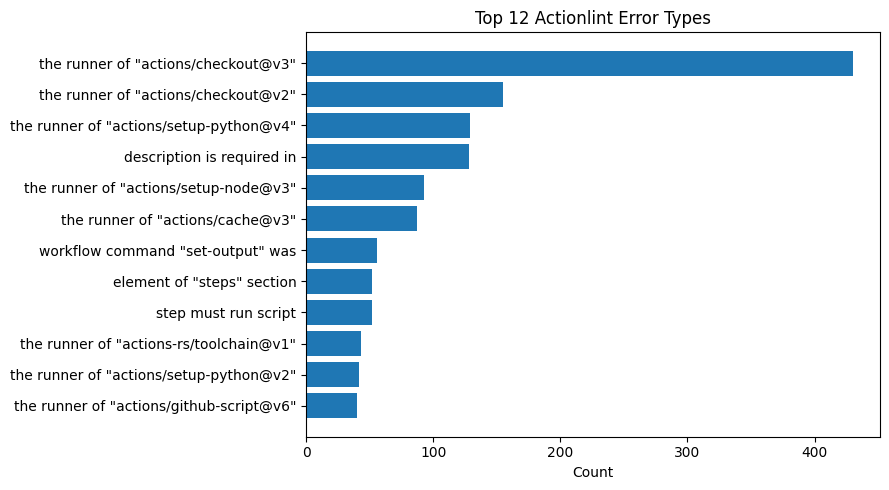

In [11]:
top = error_counts.head(12)

plt.figure(figsize=(9, 5))
plt.barh(top["Error Type"], top["Count"])
plt.gca().invert_yaxis()
plt.title("Top 12 Actionlint Error Types")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("top_errors.png", dpi=300)
plt.show()


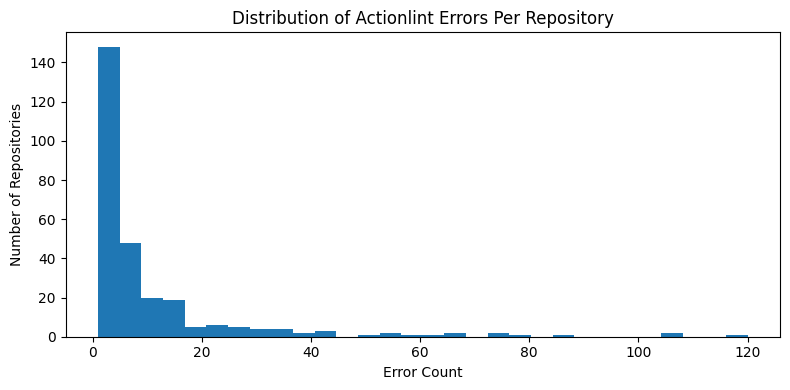

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(errors_per_repo["Error Count"], bins=30)
plt.title("Distribution of Actionlint Errors Per Repository")
plt.xlabel("Error Count")
plt.ylabel("Number of Repositories")
plt.tight_layout()
plt.savefig("repo_distribution.png", dpi=300)
plt.show()


In [13]:
def categorize(error):
    e = error.lower()

    if "the runner of" in e:
        return "Outdated / Incompatible Action Version"

    if 'label "' in e and "is unknown" in e:
        return "Unknown Runner Label"

    if '"on" section is missing' in e or '"jobs" section is missing' in e:
        return "Missing Required Workflow Sections"

    if "is not" in e or "is typed" in e:
        return "Invalid Input / Type Mismatch"

    if "set-output" in e:
        return "Deprecated GitHub Actions Feature"

    if "duplicate" in e:
        return "Duplicate or Conflicting Key"

    if "unexpected key" in e:
        return "Unexpected Key (Schema Violation)"

    if "must run script" in e:
        return "Invalid Step Definition"

    if "element of" in e:
        return "Malformed Steps Array"

    return "Other"


In [14]:
df_error_counts["category"] = df_error_counts["error_type"].apply(categorize)
category_summary = df_error_counts.groupby("category")["count"].sum().reset_index()
print(category_summary)


                                 category  count
0       Deprecated GitHub Actions Feature     56
1            Duplicate or Conflicting Key     33
2           Invalid Input / Type Mismatch    339
3                 Invalid Step Definition     52
4                   Malformed Steps Array     52
5      Missing Required Workflow Sections     49
6                                   Other    271
7  Outdated / Incompatible Action Version   1538
8       Unexpected Key (Schema Violation)     74
9                    Unknown Runner Label    508


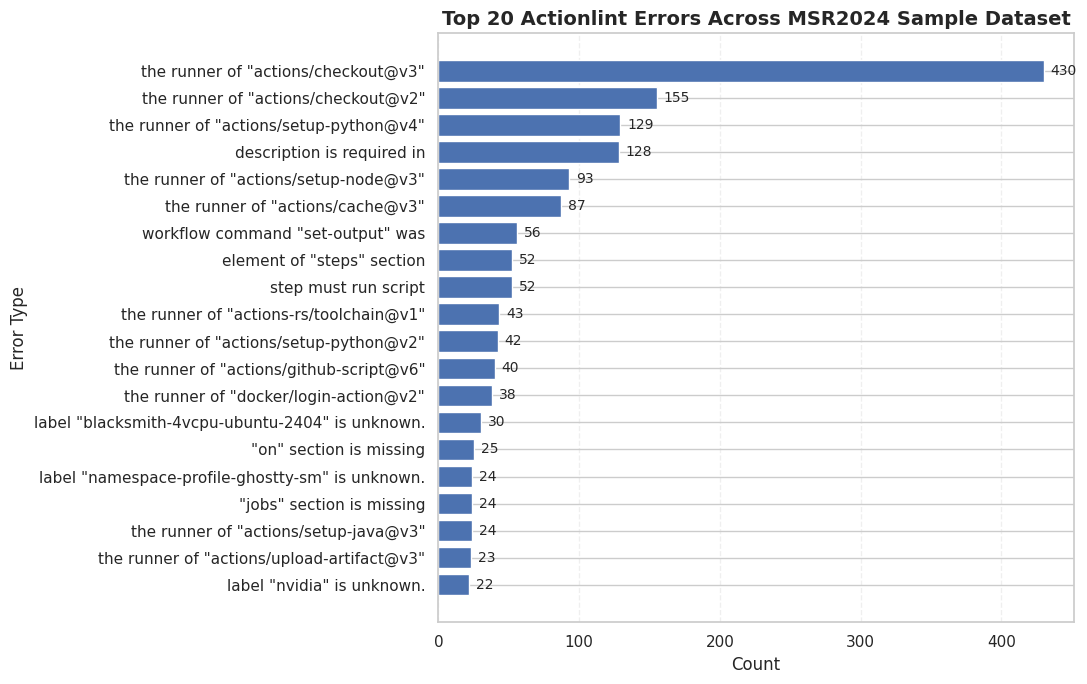

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sns.set_theme(style="whitegrid")

# Custom font (similar to Figtree)
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 13


top20 = df_error_counts.head(20)

plt.figure(figsize=(11, 7))

bars = plt.barh(top20["error_type"], top20["count"])

# Add value labels next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{int(width)}", va='center', fontsize=10)

plt.gca().invert_yaxis()

plt.xlabel("Count", fontsize=12)
plt.ylabel("Error Type", fontsize=12)
plt.title("Top 20 Actionlint Errors Across MSR2024 Sample Dataset", fontsize=14, fontweight='bold')

plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()

# plt.savefig("top20_actionlint_errors_clean.png", dpi=300)
plt.show()


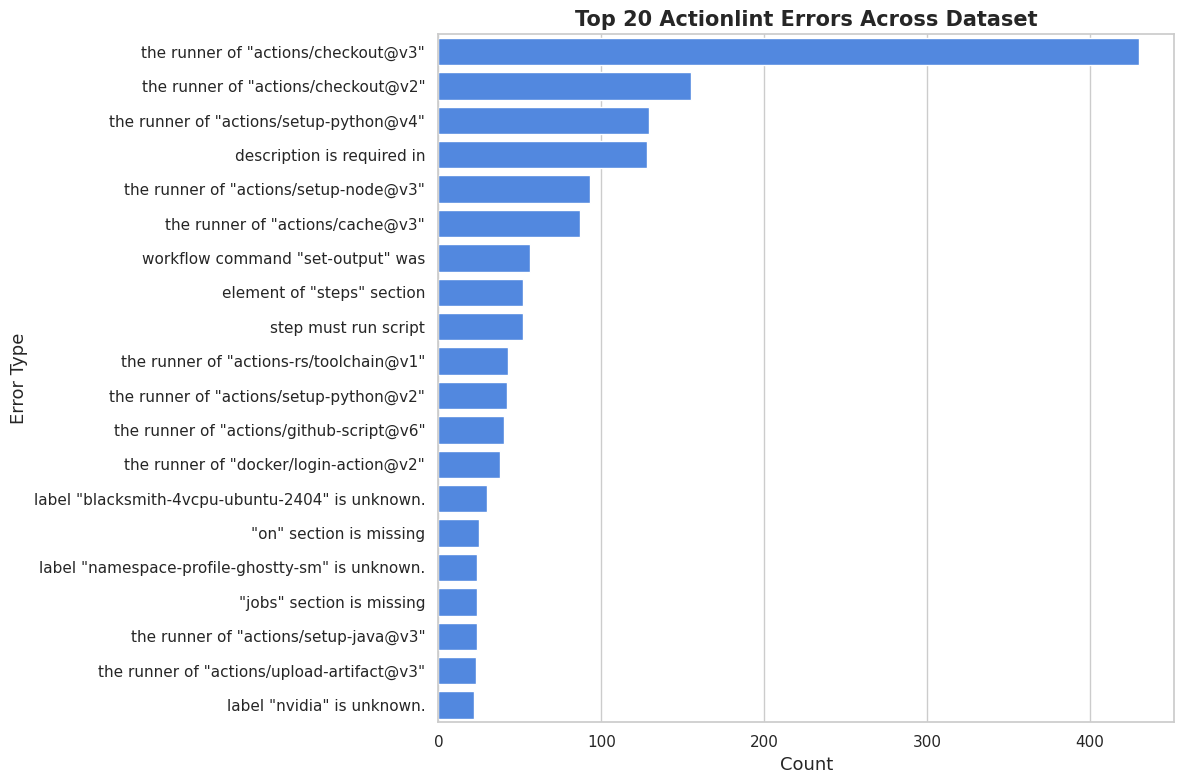

In [16]:
top20 = df_error_counts.head(20).copy()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top20,
    y="error_type",
    x="count",
    color="#3B82F6"   # Optional: Tailwind's clean blue
)

plt.title("Top 20 Actionlint Errors Across Dataset", weight="bold")
plt.xlabel("Count")
plt.ylabel("Error Type")

plt.tight_layout()
plt.show()


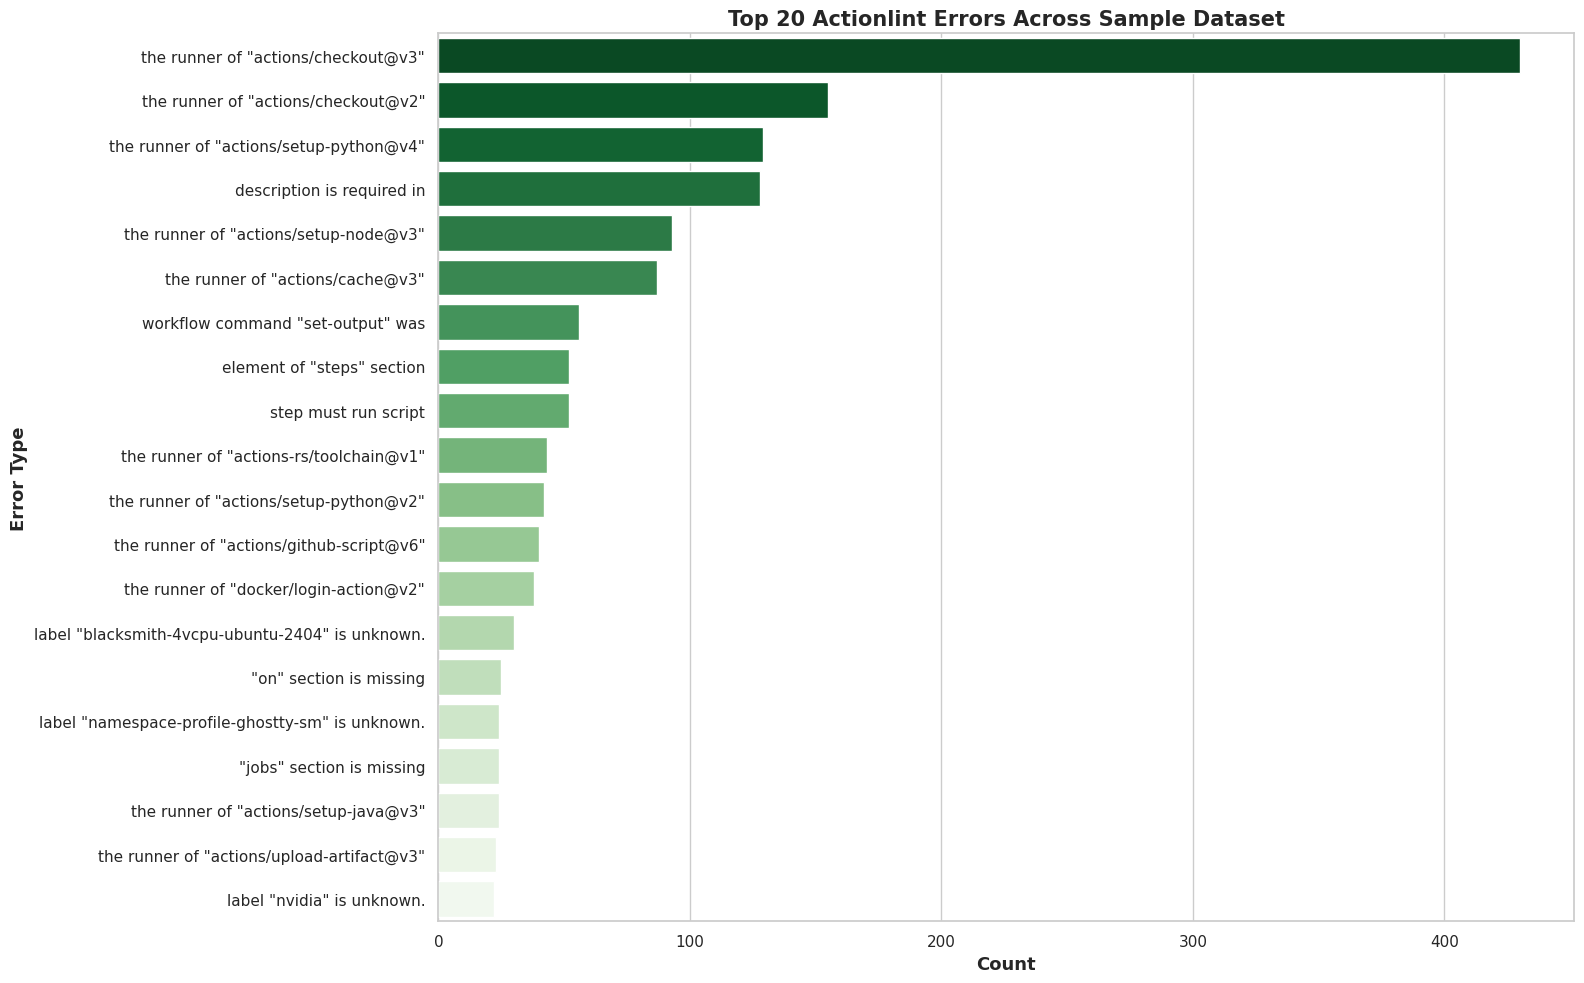

In [17]:
# plt.figure(figsize=(12, 8))
plt.figure(figsize=(16, 10))


sns.barplot(
    data=top20,
    y="error_type",
    x="count",
    palette=sns.color_palette("Greens_r", n_colors=len(top20))
)

plt.title("Top 20 Actionlint Errors Across Sample Dataset", weight="bold")
plt.xlabel("Count", fontweight='bold')
plt.ylabel("Error Type", fontweight='bold')
plt.tight_layout()
plt.show()


In [18]:
df_error_counts

,error_type,count,category
0,"the runner of ""actions/checkout@v3""",430,Outdated / Incompatible Action Version
1,"the runner of ""actions/checkout@v2""",155,Outdated / Incompatible Action Version
2,"the runner of ""actions/setup-python@v4""",129,Outdated / Incompatible Action Version
3,description is required in,128,Other
4,"the runner of ""actions/setup-node@v3""",93,Outdated / Incompatible Action Version
...,...,...,...
464,"label ""depot-ubuntu-22.04-8"" is unknown.",1,Unknown Runner Label
465,"property ""logseq_posthog_token"" is not",1,Invalid Input / Type Mismatch
466,"property ""ref"" is not",1,Invalid Input / Type Mismatch
467,"label ""depot-ubuntu-22.04-16"" is unknown.",1,Unknown Runner Label


In [19]:
df_error_counts.sort_values(by="count", ascending=False)

,error_type,count,category
0,"the runner of ""actions/checkout@v3""",430,Outdated / Incompatible Action Version
1,"the runner of ""actions/checkout@v2""",155,Outdated / Incompatible Action Version
2,"the runner of ""actions/setup-python@v4""",129,Outdated / Incompatible Action Version
3,description is required in,128,Other
4,"the runner of ""actions/setup-node@v3""",93,Outdated / Incompatible Action Version
...,...,...,...
338,"input ""python_patch"" of workflow_call",1,Other
339,"property ""build-publish-core"" is not",1,Invalid Input / Type Mismatch
340,"property ""deployment"" is not",1,Invalid Input / Type Mismatch
341,"if: condition ""github.repository_owner ==",1,Other


In [20]:
df_error_counts_grouped = df_error_counts.groupby("category")["count"].sum().reset_index()

In [21]:
df_error_counts_grouped

,category,count
0,Deprecated GitHub Actions Feature,56
1,Duplicate or Conflicting Key,33
2,Invalid Input / Type Mismatch,339
3,Invalid Step Definition,52
4,Malformed Steps Array,52
5,Missing Required Workflow Sections,49
6,Other,271
7,Outdated / Incompatible Action Version,1538
8,Unexpected Key (Schema Violation),74
9,Unknown Runner Label,508


In [22]:
df_error_counts_grouped["category"] = pd.Categorical(
    df_error_counts_grouped["category"],
    categories=df_error_counts_grouped["category"],
    ordered=True
)

df_error_counts_grouped = df_error_counts_grouped.sort_values("count", ascending=False)

In [23]:
df_error_counts_grouped

,category,count
7,Outdated / Incompatible Action Version,1538
9,Unknown Runner Label,508
2,Invalid Input / Type Mismatch,339
6,Other,271
8,Unexpected Key (Schema Violation),74
0,Deprecated GitHub Actions Feature,56
3,Invalid Step Definition,52
4,Malformed Steps Array,52
5,Missing Required Workflow Sections,49
1,Duplicate or Conflicting Key,33


In [26]:
df_error_counts_grouped["%"] = (
    df_error_counts_grouped["count"] / df_error_counts_grouped["count"].sum() * 100
)

df_error_counts_grouped["%"] = df_error_counts_grouped["%"].round(2)

In [27]:
df_error_counts_grouped

,category,count,%
7,Outdated / Incompatible Action Version,1538,51.75
9,Unknown Runner Label,508,17.09
2,Invalid Input / Type Mismatch,339,11.41
6,Other,271,9.12
8,Unexpected Key (Schema Violation),74,2.49
0,Deprecated GitHub Actions Feature,56,1.88
3,Invalid Step Definition,52,1.75
4,Malformed Steps Array,52,1.75
5,Missing Required Workflow Sections,49,1.65
1,Duplicate or Conflicting Key,33,1.11


In [78]:
df_error_counts_grouped = df_error_counts_grouped.sort_values("count", ascending=False)

df_error_counts_grouped["category"] = pd.Categorical(
    df_error_counts_grouped["category"],
    categories=df_error_counts_grouped["category"].tolist(),
    ordered=True
)


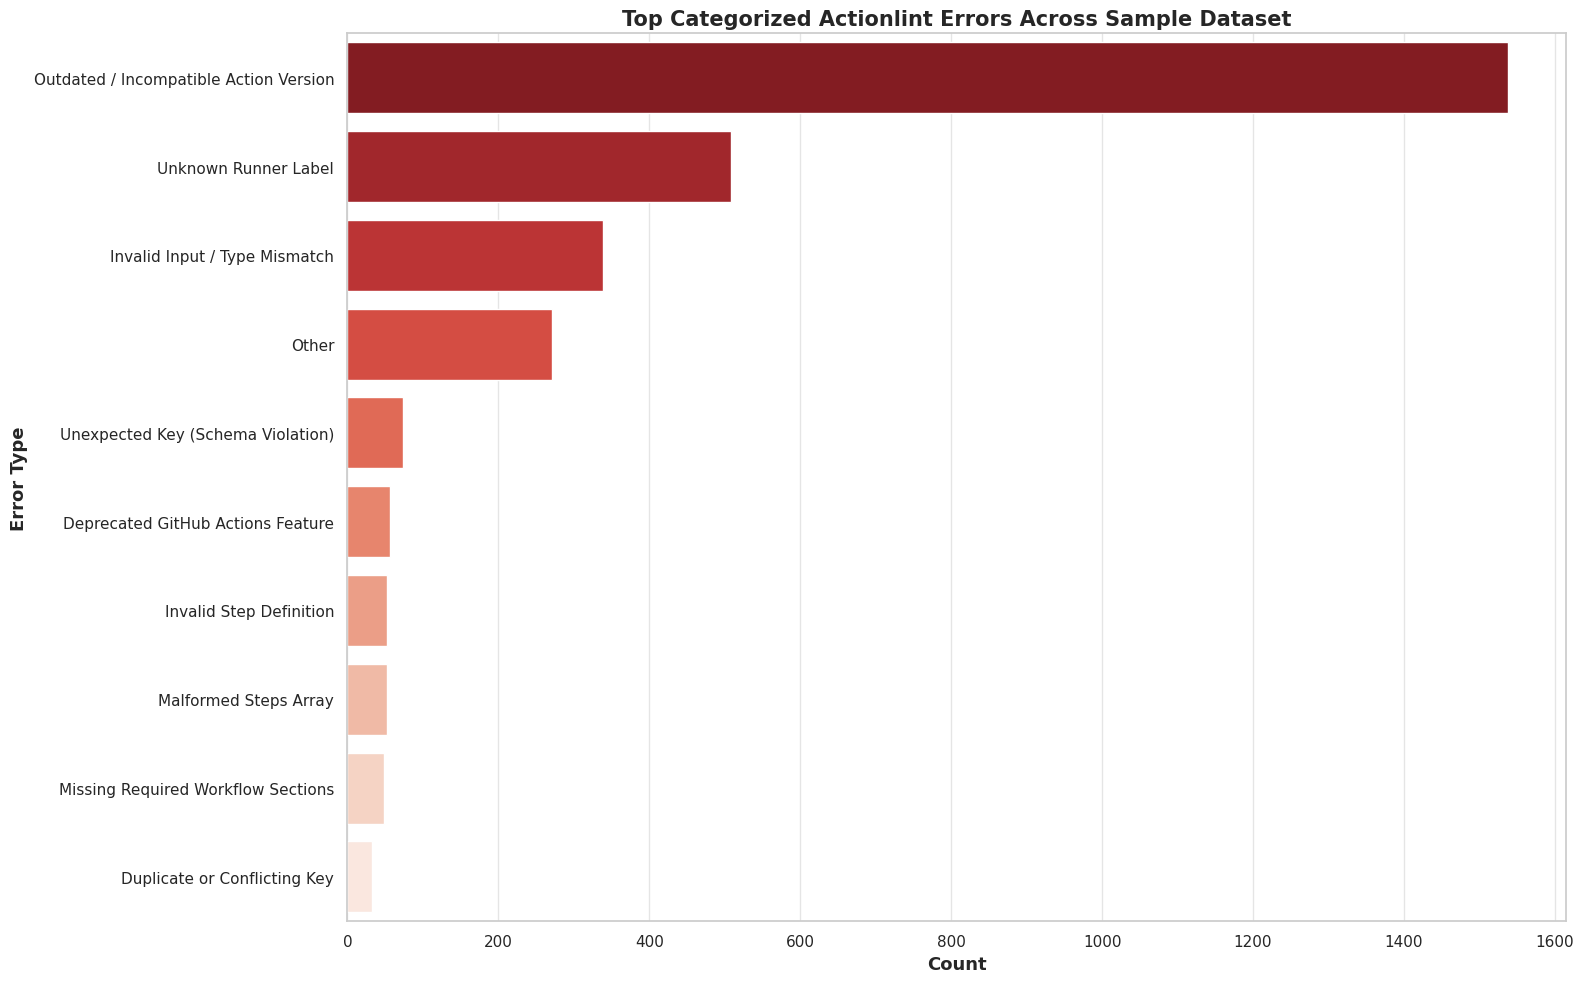

In [108]:
plt.figure(figsize=(16, 10))

sns.barplot(
    data=df_error_counts_grouped,
    y="category",
    x="count",
    palette=sns.color_palette("Reds_r", n_colors=len(df_error_counts_grouped)),
)

plt.title("Top Categorized Actionlint Errors Across Sample Dataset", weight="bold")
plt.xlabel("Count", fontweight='bold')
plt.ylabel("Error Type", fontweight='bold')
# plt.xticks(fontweight='bold')
# plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

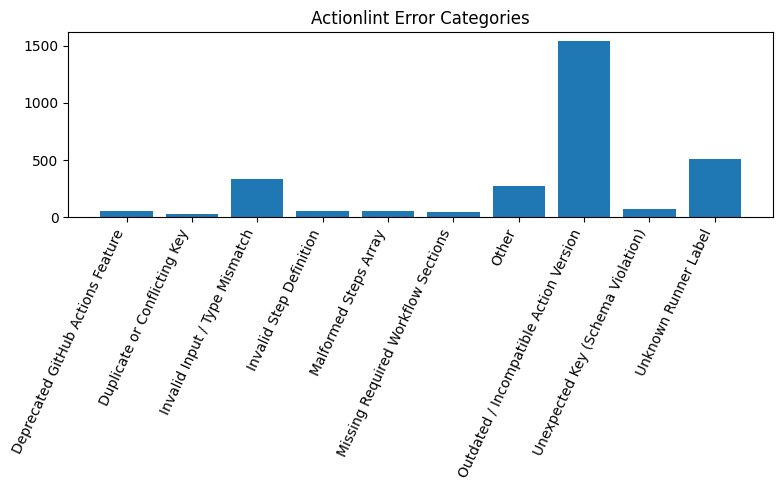

In [36]:
plt.figure(figsize=(8, 5))
plt.bar(category_summary["category"], category_summary["count"])
plt.xticks(rotation=65, ha='right')
plt.title("Actionlint Error Categories")
plt.tight_layout()
plt.savefig("actionlint_category_breakdown.png", dpi=300)
plt.show()
